# Read Video Chunk
Author: Cody W. Eilar<br/>
Course: ECE 633<br/>
Professor: Dr. Marios Pattichis<br/>

This notebook demonstrates how to read a frames using opencv. 

In [10]:
import numpy as np
import cv2
import sys
import time as t
%matplotlib inline
import matplotlib.pyplot as plt


## Read in video
First I need to read in a reasonable amount of frames to work with in memory.


In [11]:
video_path = "/Users/cody/test.mov"
cap = cv2.VideoCapture(video_path)
if not cap.isOpened(): 
    print("Fatal Error: Could not open file %s") %video_path
    exit(-1)

Read a single frame and get the size

In [12]:
ret, frame = cap.read()
if not ret: 
    print ("Could not read a frame")
    exit(-1)

print("One frame from %s is %d bytes" %(video_path, frame.nbytes))

One frame from /Users/cody/test.mov is 545280 bytes


In [13]:
# I only want to use 1/2 gig for storing frames
max_memory_usage = 500e6
num_frames = int(np.floor(max_memory_usage/frame.nbytes))
print("Max number of frames I can read: %d" %num_frames)

Max number of frames I can read: 916


## Get the total number of frames in the video

In [14]:
# Flag to get total number of frames in a video 
cv_total_frames = cv2.CAP_PROP_FRAME_COUNT
frames_in_video = int(cap.get(cv_total_frames))
print("Total number of frames in video: %d" % frames_in_video)

Total number of frames in video: 401


## Display first frame of video

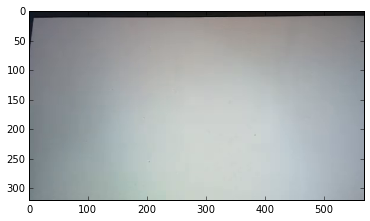

In [15]:
if (frames_in_video < num_frames): 
    num_frames = frames_in_video
plt.imshow(frame)
plt.show()

## Read frames and store them in memory

In [29]:
def ReadFrame(num): 
    cap.set(cv2.CAP_PROP_POS_FRAMES, num)
    ret, frame = cap.read()
    if not ret:
        print("Fatal Error: Could not read/decode frame %d" %num)
        exit(-1)
    return frame

frame_nums = list(range(0, int(num_frames)))

%timeit mem_frames = list(map(ReadFrame, frame_nums))

1 loops, best of 3: 5.58 s per loop


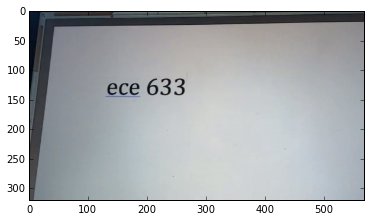

In [20]:
plt.imshow(mem_frames[num_frames-1])
plt.show()